<a href="https://colab.research.google.com/github/Vishalchopra07/Data-Analytics/blob/main/Youtube_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 orignal data
       VideoID    Views   Likes  Comments  DurationSec  CategoryCode  \
0        VID_0  6424388  439472     48831         2309            11   
1        VID_1  6551634  324988     32286         2435             4   
2        VID_2  4305572  148943     33640         2555             4   
3        VID_3  2235489  463126      4537         3530             6   
4        VID_4  9959614  297297     12257         2060             6   
...        ...      ...     ...       ...          ...           ...   
9995  VID_9995  1186622  355759     15621          260            12   
9996  VID_9996  4193907   52242      4500          608             4   
9997  VID_9997  6631064  389401     31323         3578             4   
9998  VID_9998   546501  405868      6387         3027            12   
9999  VID_9999  5200039   93030      9913         1142             9   

      UploadYear  SubscribersAtUpload  
0           2019              8674767  
1           2011              4350771  


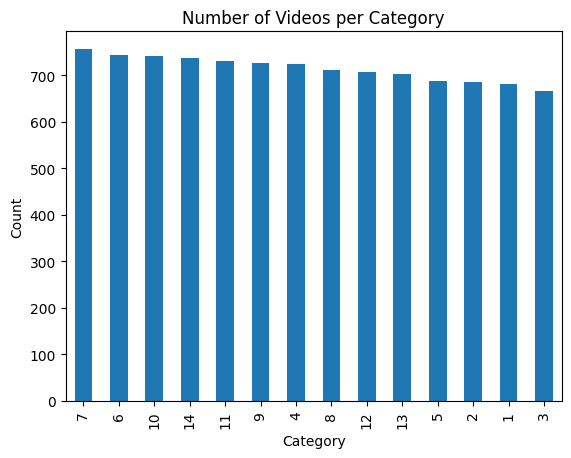

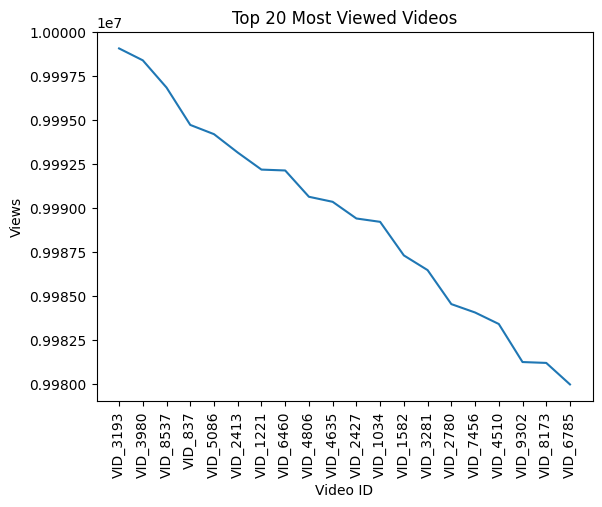

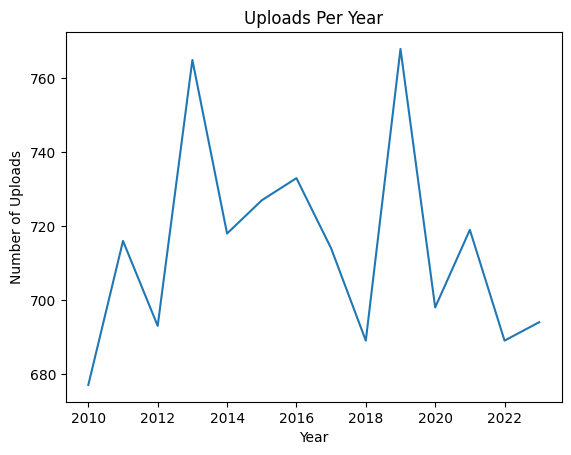

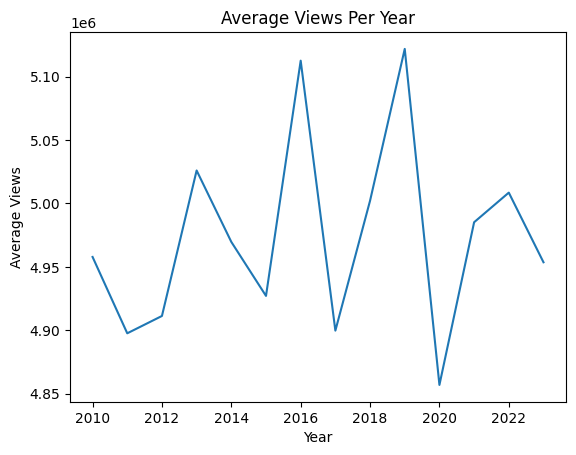

In [1]:
#Pandas project.
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("youtube_dataset_10000.csv")
print("\n orignal data")
print(df)
# # first 10 data
df.head(10)
# check missing value
df.isnull().sum()

# value check in the form of true and false
df.isna()
# check duplicate values.

print("\n Modify  data")
duplicacy_check=df.drop_duplicates()
print(duplicacy_check)

# B Channel performance.

Most_upload_videos=df['CategoryCode'].value_counts()
print("B1: Category with most videos:")
print(Most_upload_videos.head(10), "\n")

# heighest view
# The previous line caused an AttributeError because sort_values cannot be directly called on a SeriesGroupBy object.
# To find the highest view for each CategoryCode and then sort them,
# first apply an aggregation function like .max(), and then sort the resulting Series.

Highest_view=df.groupby('CategoryCode')['Views'].max().sort_values(ascending=False)
print(Highest_view)

# also find with highest average view .

Highest_Avg_view = df.groupby('CategoryCode')['Views'].mean().sort_values(ascending=False)
print(Highest_Avg_view.head(10))


#Vedio eith highest engagement---
df['Engagement']=(df['Likes']+df['Comments'])/df['Views'].replace(0,1)
top10_engagement = df.sort_values(by='Engagement',ascending=False).head(10)

#  Top 10 videos with highest engagement ----
df['Engagement'] = (df['Likes'] + df['Comments']) / df['Views'].replace(0,1) # Corrected 'views' to 'Views'
top10_engagement = df.sort_values(by='Engagement',ascending = False).head(10)
print("Top 10 highest engagement videos:")
print(top10_engagement[['VideoID', 'Views', 'Likes', 'Comments', 'Engagement']], "\n")

#  Category with highest engagement rate ----
cat_engagement = df.groupby('CategoryCode')['Engagement'].mean().sort_values(ascending=False)
print("Categories with highest engagement rate:")
print(cat_engagement.head(10))


#  Top 20 most viewed videos ----
top20_views = df.sort_values(by = 'Views',ascending=False).head(20) # Corrected 'views' to 'Views'
print(" Top 20 most viewed videos:")
print(top20_views[['VideoID', 'Views', 'Likes', 'Comments']], "\n")

#  Best performing category (highest average views) ----
best_category = df.groupby('CategoryCode')['Views'].mean().sort_values(ascending=False)
print("Categories ranked by performance (avg views):")
print(best_category.head(10), "\n")

#  Videos with highest likes ----
top_liked = df.sort_values(by='Likes', ascending=False).head(20)
print(" Top 20 most liked videos:")
print(top_liked[['VideoID', 'Views', 'Likes', 'Comments']], "\n")

# Category with longest average video duration ----
longest_duration = df.groupby('CategoryCode')['DurationSec'].mean().sort_values(ascending=False)
print(" Categories ranked by average duration:")
print(longest_duration.head(10))



# Relationship between Views and Likes ----
views_likes_corr = df['Views'].corr(df['Likes'])
print(" Correlation between Views and Likes:", views_likes_corr, "\n")

# Relationship between Views and Comments ----
views_comments_corr = df['Views'].corr(df['Comments'])
print("Correlation between Views and Comments:", views_comments_corr, "\n")

#  Top 20 videos by engagement ----
top20_engagement = df.sort_values(by='Engagement', ascending=False).head(20)
print("Top 20 most engaging videos:")
print(top20_engagement[['VideoID', 'Views', 'Likes', 'Comments', 'Engagement']], "\n")

#  Number of uploads each year ----
uploads_per_year = df['UploadYear'].value_counts().sort_index()
print(" Number of uploads per year:")
print(uploads_per_year, "\n")

#  Average views per year ----
avg_views_per_year = df.groupby('UploadYear')['Views'].mean().sort_index()
print(" Average views per year:")
print(avg_views_per_year, "\n")

# Average likes per year ----
avg_likes_per_year = df.groupby('UploadYear')['Likes'].mean().sort_index()
print(" Average likes per year:")
print(avg_likes_per_year)


# Views vs Video Duration ----
duration_views_corr = df['DurationSec'].corr(df['Views'])
print(" Correlation between Duration and Views:", duration_views_corr, "\n")

#  Views vs Subscribers at upload ----
subs_views_corr = df['SubscribersAtUpload'].corr(df['Views'])
print(" Correlation between Subscribers and Views:", subs_views_corr, "\n")

# graphs
# Category Count (Most Uploaded Category)
plt.figure()
df['CategoryCode'].value_counts().plot(kind='bar')
plt.title("Number of Videos per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Top 20 Most Viewed Videos

plt.figure()
top20_views = df.sort_values(by='Views', ascending=False).head(20)
plt.plot(top20_views['VideoID'], top20_views['Views'])
plt.title("Top 20 Most Viewed Videos")
plt.xlabel("Video ID")
plt.ylabel("Views")
plt.xticks(rotation=90)
plt.show()

# GRAPH 3 — Uploads Per Year
plt.figure()
uploads_per_year = df['UploadYear'].value_counts().sort_index()

plt.plot(uploads_per_year.index, uploads_per_year.values)
plt.title("Uploads Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Uploads")
plt.show()


# GRAPH 4 — Average Views Per Year
plt.figure()
avg_views_per_year = df.groupby('UploadYear')['Views'].mean().sort_index()

plt.plot(avg_views_per_year.index, avg_views_per_year.values)
plt.title("Average Views Per Year")
plt.xlabel("Year")
plt.ylabel("Average Views")
plt.show()